In [107]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [135]:
df = pd.read_csv('/Users/zoepan/Desktop/orie4741_project/data/county_2016_preprocessed1.csv')
df.dtypes
df.head()

,FIPS,County,DEM,GOP,MedianIncome,MigraRate,BirthRate,DeathRate,BachelorRate,UnemploymentRate,State,zip,primary_city,latitude,longitude,estimated_population
0,1001,Autauga,5908.0,18110.0,"54,487",5.3,12.2,10.0,27.7,5.1,AL,36003.0,Autaugaville,32.43,-86.65,1628.0
1,1003,Baldwin,18409.0,72780.0,"56,460",21.5,11.2,9.8,31.3,5.3,AL,31034.0,Hardwick,32.99,-83.29,1741.0
2,1005,Barbour,4848.0,5431.0,"32,884",-18.2,10.6,10.8,12.2,8.3,AL,26238.0,Volga,39.06,-80.11,698.0
3,1007,Bibb,1874.0,6733.0,"43,079",-0.8,12.1,10.8,11.5,6.4,AL,31052.0,Lizella,32.76,-83.86,7592.0
4,1009,Blount,2150.0,22808.0,"47,213",-1.0,12.2,11.2,12.6,5.4,AL,35013.0,Allgood,33.90,-86.51,0.0


In [149]:
df_2012 = pd.DataFrame([df["State"], df["DEM"], df["GOP"], df["MedianIncome"],df["UnemploymentRate"],df["BachelorRate"],df["MigraRate"],df["BirthRate"],df["DeathRate"],df["estimated_population"]]).transpose()
df_2012 = df_2012.replace(',','', regex=True)
df_2012["MedianIncome"] = df_2012["MedianIncome"].fillna(0)
df_2012["MedianIncome"] = df_2012["MedianIncome"].astype(str).astype(float)
df_2012.dtypes

State                    object
DEM                     float64
GOP                     float64
MedianIncome            float64
UnemploymentRate        float64
BachelorRate            float64
MigraRate               float64
BirthRate               float64
DeathRate               float64
estimated_population    float64
dtype: object

Splitting regions based on wikipedia article (Census Bureau-designated regions and divisions)
https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States

Region 1: Northeast  
- Division 1: New England (Connecticut, Maine, Massachusetts, New Hampshire, Rhode Island, and Vermont)  
- Division 2: Mid-Atlantic (New Jersey, New York, and Pennsylvania)

In [150]:
new_england_list = ["CT", "ME", "MA", "NH", "RI", "VT"]
mid_atlantic_list = ["NJ", "NY", "PA"]

northeast = df_2012[df_2012['State'].isin(new_england_list + mid_atlantic_list)]
new_england = df_2012[df_2012['State'].isin(new_england_list)]
mid_atlantic = df_2012[df_2012['State'].isin(mid_atlantic_list)]

In [151]:
northeast

,State,DEM,GOP,MedianIncome,UnemploymentRate,BachelorRate,MigraRate,BirthRate,DeathRate,estimated_population
308,CT,238723.0,155457.0,89954.0,4.9,47.4,-4.0,10.6,7.1,0.0
309,CT,233789.0,147912.0,69341.0,5.4,37.8,-4.2,10.5,8.7,0.0
310,CT,39836.0,53376.0,76323.0,4.7,35.1,-5.4,7.8,9.7,2308.0
311,CT,45306.0,38847.0,80190.0,4.4,41.5,-1.3,8.0,9.1,2749.0
312,CT,203601.0,158373.0,66012.0,5.5,34.9,-3.9,10.3,9.0,15455.0
...,...,...,...,...,...,...,...,...,...,...
2815,VT,5181.0,5158.0,43107.0,5.3,21.6,-7.5,10.0,12.5,0.0
2816,VT,13629.0,12471.0,50569.0,3.8,30.3,-4.2,8.6,11.7,16970.0
2817,VT,18594.0,7993.0,55803.0,3.2,41.5,-4.9,9.1,9.2,2518.0
2818,VT,14340.0,5462.0,47074.0,3.3,38.6,0.0,8.8,10.5,3543.0


Text(0, 0.5, 'Frequency')

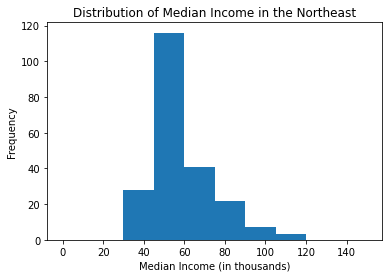

In [152]:
plt.title('Distribution of Median Income in the Northeast')
plt.hist(northeast["MedianIncome"]/1000, range=[0, 150])
plt.xlabel("Median Income (in thousands)")
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

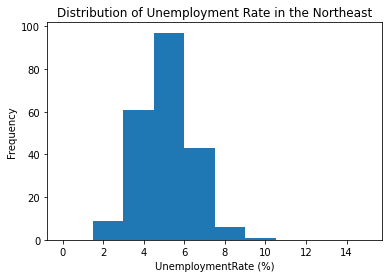

In [153]:
plt.title('Distribution of Unemployment Rate in the Northeast')
plt.hist(northeast["UnemploymentRate"], range=[0,15])
plt.xlabel("UnemploymentRate (%)")
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

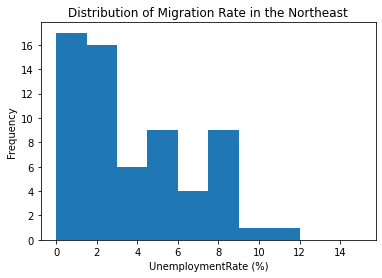

In [154]:
plt.title('Distribution of Migration Rate in the Northeast')
plt.hist(northeast["MigraRate"], range=[0,15])
plt.xlabel("UnemploymentRate (%)")
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

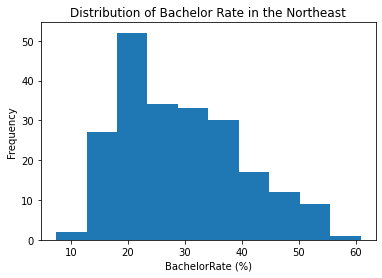

In [155]:
plt.title('Distribution of Bachelor Rate in the Northeast')
plt.hist(northeast["BachelorRate"])
plt.xlabel("BachelorRate (%)")
plt.ylabel('Frequency')

Region 2: Midwest  
- Division 3: East North Central (Illinois, Indiana, Michigan, Ohio, and Wisconsin)  
- Division 4: West North Central (Iowa, Kansas, Minnesota, Missouri, Nebraska, North Dakota, and South Dakota)

In [156]:
east_north_central_list = ["IL", "IN", "MI", "OH", "WI"]
west_north_central_list = ["IA", "KS", "MN", "MO", "NE", "ND", "SD"]

midwest = df_2012[df_2012['State'].isin(east_north_central_list + west_north_central_list)]
east_north_central = df_2012[df_2012['State'].isin(east_north_central_list)]
west_north_central = df_2012[df_2012['State'].isin(west_north_central_list)]

Text(0, 0.5, 'Frequency')

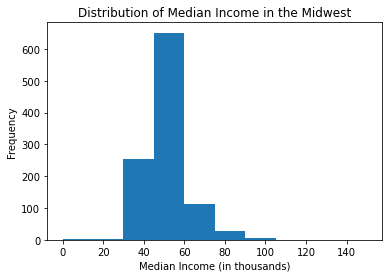

In [157]:
plt.title('Distribution of Median Income in the Midwest')
plt.hist(midwest["MedianIncome"]/1000, range=[0, 150])
plt.xlabel("Median Income (in thousands)")
plt.ylabel('Frequency')

/Applications/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Applications/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'Frequency')

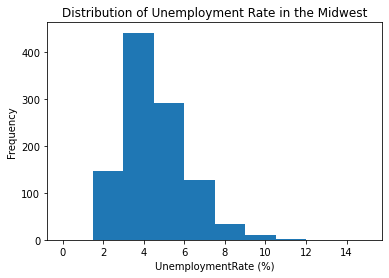

In [158]:
plt.title('Distribution of Unemployment Rate in the Midwest')
plt.hist(midwest["UnemploymentRate"], range=[0,15])
plt.xlabel("UnemploymentRate (%)")
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

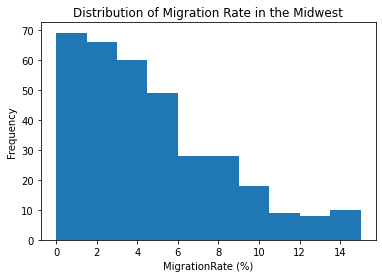

In [159]:
plt.title('Distribution of Migration Rate in the Midwest')
plt.hist(midwest["MigraRate"], range=[0,15])
plt.xlabel("MigrationRate (%)")
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

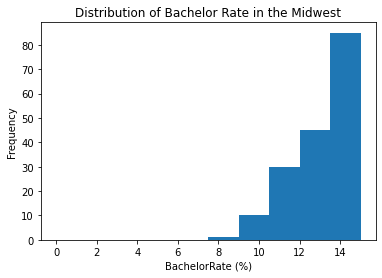

In [160]:
plt.title('Distribution of Bachelor Rate in the Midwest')
plt.hist(midwest["BachelorRate"], range=[0,15])
plt.xlabel("BachelorRate (%)")
plt.ylabel('Frequency')

Region 3: South
- Division 5: South Atlantic (Delaware, Florida, Georgia, Maryland, North Carolina, South Carolina, Virginia, District of Columbia, and West Virginia)
- Division 6: East South Central (Alabama, Kentucky, Mississippi, and Tennessee)
- Division 7: West South Central (Arkansas, Louisiana, Oklahoma, and Texas)

In [161]:
south_atlantic_list = ["DE", "FL", "GA", "MD", "NC", "VA", "DC", "WV"]
east_south_central_list = ["AL", "KY", "MS", "TN"]
west_south_central_list = ["AR", "LA", "OK", "TX"]

south = df_2012[df_2012['State'].isin(south_atlantic_list+east_south_central_list+west_south_central_list)]
south_atlantic = df_2012[df_2012['State'].isin(south_atlantic_list)]
east_south_central = df_2012[df_2012['State'].isin(east_south_central_list)]
west_south_central = df_2012[df_2012['State'].isin(west_south_central_list)]

Text(0, 0.5, 'Frequency')

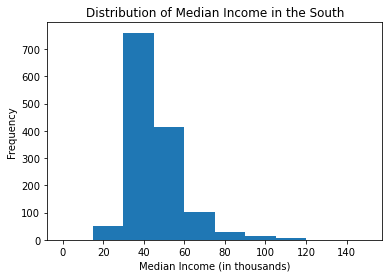

In [162]:
plt.title('Distribution of Median Income in the South')
plt.hist(south["MedianIncome"]/1000, range=[0, 150])
plt.xlabel("Median Income (in thousands)")
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

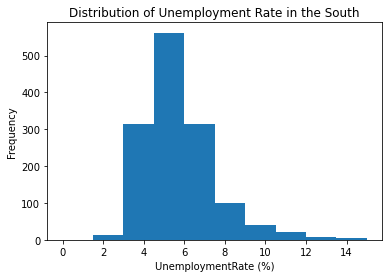

In [163]:
plt.title('Distribution of Unemployment Rate in the South')
plt.hist(south["UnemploymentRate"], range=[0,15])
plt.xlabel("UnemploymentRate (%)")
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

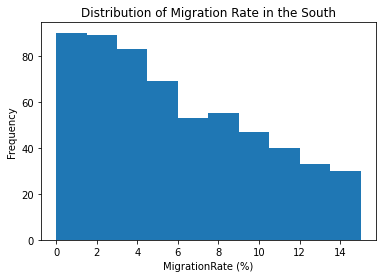

In [164]:
plt.title('Distribution of Migration Rate in the South')
plt.hist(south["MigraRate"], range=[0,15])
plt.xlabel("MigrationRate (%)")
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

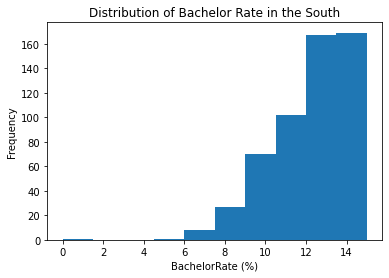

In [165]:
plt.title('Distribution of Bachelor Rate in the South')
plt.hist(south["BachelorRate"], range=[0,15])
plt.xlabel("BachelorRate (%)")
plt.ylabel('Frequency')

Region 4: West
- Division 8: Mountain (Arizona, Colorado, Idaho, Montana, Nevada, New Mexico, Utah, and Wyoming)
- Division 9: Pacific (Alaska, California, Hawaii, Oregon, and Washington)

In [166]:
mountain_list = ["AZ", "CO", "ID", "MT", "NV", "NM", "UT", "WY"]
pacific_list = ["AK", "CA", "HI", "OR", "WA"]

west = df_2012[df_2012['State'].isin(mountain_list+pacific_list)]
mountain = df_2012[df_2012['State'].isin(mountain_list)]
pacific = df_2012[df_2012['State'].isin(pacific_list)]

Text(0, 0.5, 'Frequency')

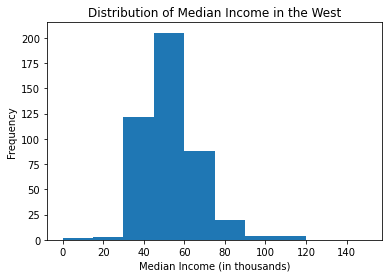

In [167]:
plt.title('Distribution of Median Income in the West')
plt.hist(west["MedianIncome"]/1000, range=[0, 150])
plt.xlabel("Median Income (in thousands)")
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

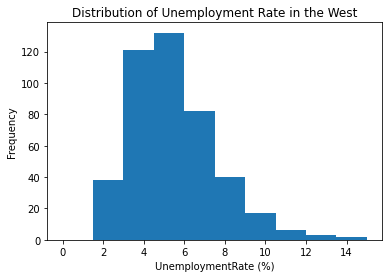

In [168]:
plt.title('Distribution of Unemployment Rate in the West')
plt.hist(west["UnemploymentRate"], range=[0,15])
plt.xlabel("UnemploymentRate (%)")
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

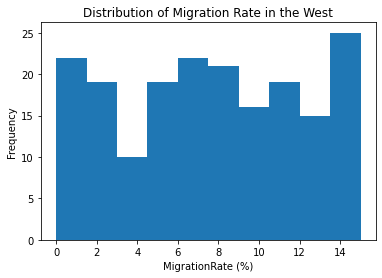

In [169]:
plt.title('Distribution of Migration Rate in the West')
plt.hist(west["MigraRate"], range=[0,15])
plt.xlabel("MigrationRate (%)")
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

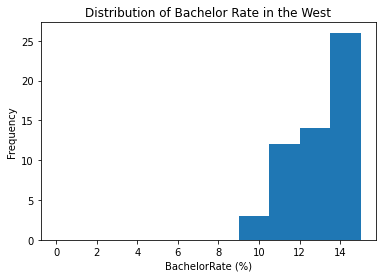

In [170]:
plt.title('Distribution of Bachelor Rate in the West')
plt.hist(west["BachelorRate"], range=[0,15])
plt.xlabel("BachelorRate (%)")
plt.ylabel('Frequency')

# Final Visualizations

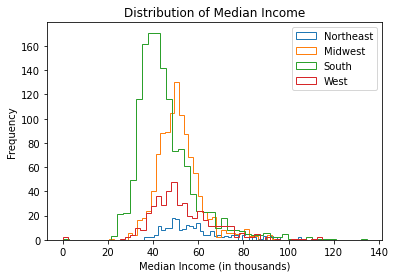

In [171]:
#Median Income

#Northeast
plt.title('Distribution of Median Income')
plt.hist(northeast["MedianIncome"]/1000, bins = 50, label="Northeast", histtype='step', stacked=True, fill=False)
plt.xlabel("Median Income (in thousands)")
plt.ylabel('Frequency')

#Midwest
plt.hist(midwest["MedianIncome"]/1000, bins = 50, label="Midwest", histtype='step', stacked=True, fill=False)

#South
plt.hist(south["MedianIncome"]/1000, bins = 50, label="South", histtype='step', stacked=True, fill=False)

#West
plt.hist(west["MedianIncome"]/1000, bins = 50, label="West", histtype='step', stacked=True, fill=False)

plt.legend(loc='upper right')

/Applications/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Applications/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Applications/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Applications/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Applications/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Applications/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp

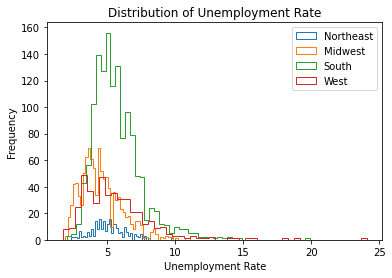

In [172]:
#Unemployment Rate

#Northeast
plt.title('Distribution of Unemployment Rate')
plt.hist(northeast["UnemploymentRate"], bins = 50, label="Northeast", histtype='step', stacked=True, fill=False)
plt.xlabel("Unemployment Rate")
plt.ylabel('Frequency')

#Midwest
plt.hist(midwest["UnemploymentRate"], bins = 50, label="Midwest", histtype='step', stacked=True, fill=False)

#South
plt.hist(south["UnemploymentRate"], bins = 50, label="South", histtype='step', stacked=True, fill=False)

#West
plt.hist(west["UnemploymentRate"], bins = 50, label="West", histtype='step', stacked=True, fill=False)

plt.legend(loc='upper right')

/Applications/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Applications/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Applications/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Applications/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Applications/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Applications/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp

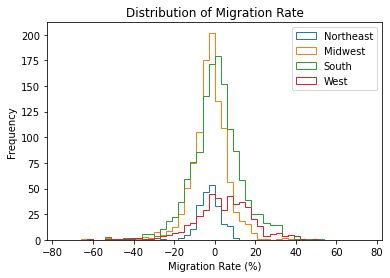

In [173]:
#Migration Rate

#Northeast
plt.title('Distribution of Migration Rate')
plt.hist(northeast["MigraRate"], bins = 50, range=[-75,75], label="Northeast", histtype='step', stacked=True, fill=False)
plt.xlabel("Migration Rate (%)")
plt.ylabel('Frequency')

#Midwest
plt.hist(midwest["MigraRate"], bins = 50, range=[-75,75], label="Midwest", histtype='step', stacked=True, fill=False)

#South
plt.hist(south["MigraRate"], bins = 50, range=[-75,75], label="South", histtype='step', stacked=True, fill=False)

#West
plt.hist(west["MigraRate"], bins = 50, range=[-75,75], label="West", histtype='step', stacked=True, fill=False)

plt.legend(loc='upper right')

/Applications/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Applications/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Applications/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Applications/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Applications/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Applications/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp

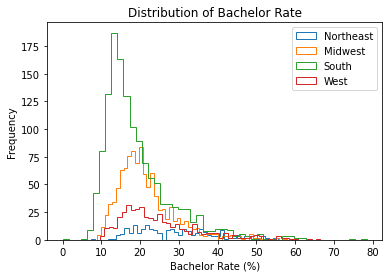

In [174]:
#Bachelor Rate

#Northeast
plt.title('Distribution of Bachelor Rate')
plt.hist(northeast["BachelorRate"], bins = 50, label="Northeast", histtype='step', stacked=True, fill=False)
plt.xlabel("Bachelor Rate (%)")
plt.ylabel('Frequency')

#Midwest
plt.hist(midwest["BachelorRate"], bins = 50, label="Midwest", histtype='step', stacked=True, fill=False)

#South
plt.hist(south["BachelorRate"], bins = 50, label="South", histtype='step', stacked=True, fill=False)

#West
plt.hist(west["BachelorRate"], bins = 50, label="West", histtype='step', stacked=True, fill=False)

plt.legend(loc='upper right')

/Applications/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Applications/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Applications/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Applications/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Applications/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Applications/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp

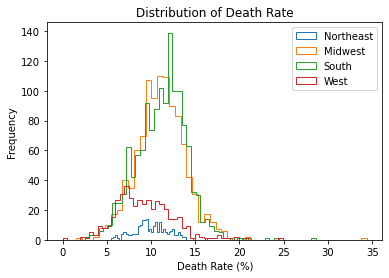

In [175]:
#Death Rate

#Northeast
plt.title('Distribution of Death Rate')
plt.hist(northeast["DeathRate"], bins = 50, label="Northeast", histtype='step', stacked=True, fill=False)
plt.xlabel("Death Rate (%)")
plt.ylabel('Frequency')

#Midwest
plt.hist(midwest["DeathRate"], bins = 50, label="Midwest", histtype='step', stacked=True, fill=False)

#South
plt.hist(south["DeathRate"], bins = 50, label="South", histtype='step', stacked=True, fill=False)

#West
plt.hist(west["DeathRate"], bins = 50, label="West", histtype='step', stacked=True, fill=False)

plt.legend(loc='upper right')

/Applications/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Applications/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Applications/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Applications/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Applications/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Applications/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp

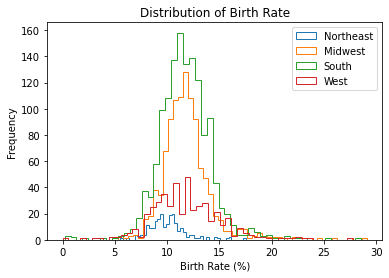

In [176]:
#Birth Rate

#Northeast
plt.title('Distribution of Birth Rate')
plt.hist(northeast["BirthRate"], bins = 50, label="Northeast", histtype='step', stacked=True, fill=False)
plt.xlabel("Birth Rate (%)")
plt.ylabel('Frequency')

#Midwest
plt.hist(midwest["BirthRate"], bins = 50, label="Midwest", histtype='step', stacked=True, fill=False)

#South
plt.hist(south["BirthRate"], bins = 50, label="South", histtype='step', stacked=True, fill=False)

#West
plt.hist(west["BirthRate"], bins = 50, label="West", histtype='step', stacked=True, fill=False)

plt.legend(loc='upper right')

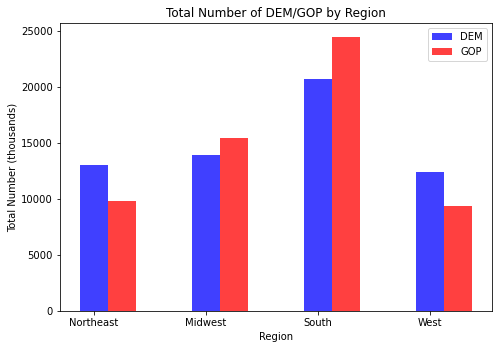

In [213]:
#Bar graph of DEM/GOP

ne_dem = northeast["DEM"].sum()
ne_gop = northeast["GOP"].sum()

mw_dem = midwest["DEM"].sum()
mw_gop = midwest["GOP"].sum()

s_dem = south["DEM"].sum()
s_gop = south["GOP"].sum()

w_dem = west["DEM"].sum()
w_gop = west["GOP"].sum()

regions = ['Northeast', 'Midwest', 'South', 'West']
data = [[ne_dem/1000, mw_dem/1000, s_dem/1000, w_dem/1000], [ne_gop/1000, mw_gop/1000, s_gop/1000, w_gop/1000]]

X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Total Number (thousands)')
ax.set_xlabel('Region')
ax.set_title('Total Number of DEM/GOP by Region')

ax.bar(regions, data[0], color = 'b', width = 0.25, alpha = 0.75)
ax.bar(X + 0.25, data[1], color = 'r', width = 0.25, alpha = 0.75)
ax.legend(labels=['DEM', 'GOP'])